## Installing the Libraries

In [1]:
# for basic operation 
import numpy as np
import pandas as pd

In [2]:
# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# setting chart
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)

## Reading the Dataset

In [5]:
# importing the dataset
data = pd.read_csv('Mall_Customers.csv')
data.shape

(200, 5)

In [6]:
# lets check the head of the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Hierarchial Clustering Analysis

In [7]:
# we want to perform clusters of Customers who share similar behaviour for that lets select the columns
# Spending score, and Annual Income

# lets import the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Lets select the Spending score, and Annual Income Columns from the Data
x = data.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

In [9]:
# let's check the shape of x
print(x.shape)

(200, 2)


In [10]:
# lets also check the data, which we are going to use for the clustering analysis
x_data  = pd.DataFrame(x)
x_data.head()
# where o->Spending Score, and 1->Annual Income

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


* Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other

### Using Dendrograms to find the no. of Optimal Clusters

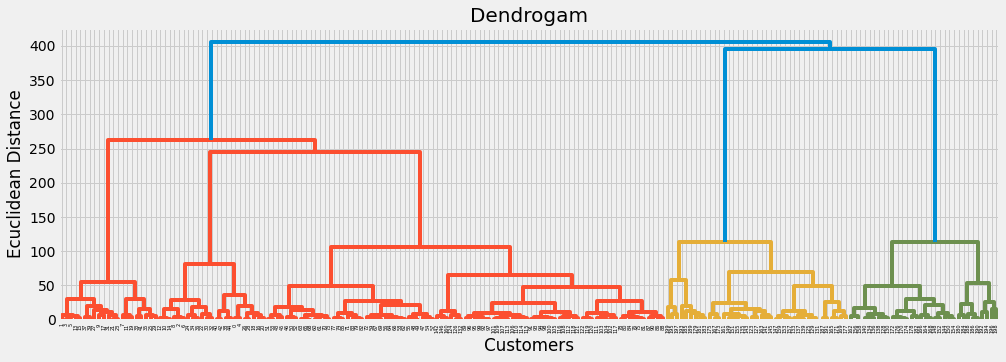

In [11]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

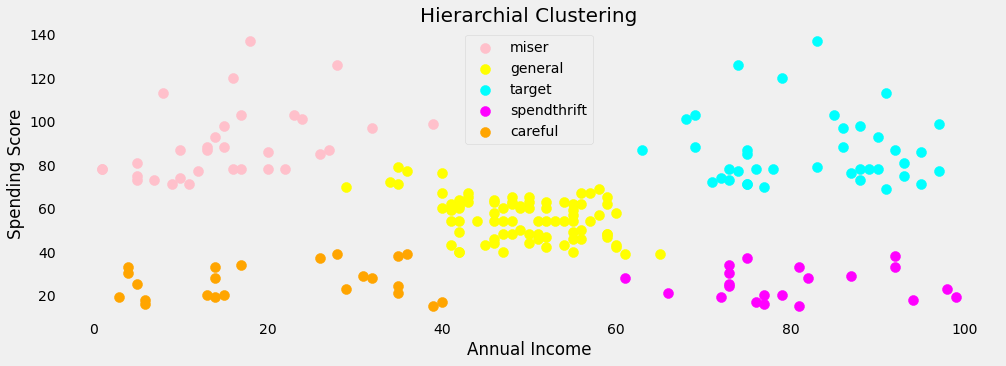

In [12]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

* We can see the Results are similar to that of K Means, Both K Means and Hierarchial Clustering are suitable for Small to Medium Datasets Only.
* If you want to Work on Larger Datasets then you might have to learn the DBSCAN Algorithm, which can be used for Larger Datasets as well.

* You can go to our Clustering Analysis Course and Learn DBSCAN Clustering Algorithm.